In [50]:
#INITIALIZION

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

import sys
import os

os.sys.path.append('/usr/common/software/rootpy')

os.sys.path.insert(0,'/usr/common/software/uproot')
import uproot
import ROOT

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
print("Starting notebook....")

from os import listdir
from os.path import isfile, join


Starting notebook....


In [2]:
#select file prefixes for processing
fullFilePath = "/global/cfs/cdirs/lz/users/grischbi/MSSI/wall_Sims/"

filePrefixes = ["output_20200318_wallBG"]
filePrefixes.append("output_20200319_wallBG")
filePrefixes.append("output_20200320_wallBG")
filePrefixes.append("output_20200321_wallBG")



In [3]:
#get ER and NR band files:
erBandFile = [line.rstrip() for line in open("erBand_MDC3.dat")]
nrBandFile = [line.rstrip() for line in open("nrBand_MDC3.dat")]

xER, yER, yHiER, yLoER = [], [], [], []
xNR, yNR, yHiNR, yLoNR = [], [], [], []

    
for i in range(1, len(erBandFile)-1):
    templist = erBandFile[i].split()
    xER.append(float(templist[0]))
    yER.append(float(templist[2]))
    yHiER.append(float(templist[2]) + float(templist[4]))
    yLoER.append(float(templist[2]) - float(templist[4]))


for i in range(1, len(nrBandFile)-1):
    templist = nrBandFile[i].split()
    xNR.append(float(templist[0]))
    yNR.append(float(templist[2]))
    yHiNR.append(float(templist[2]) + float(templist[4]))
    yLoNR.append(float(templist[2]) - float(templist[4]))
    #print(xNR[i-1], yNR[i-1])
    
def plotER(label):
    if label == True:
        plt.plot(xER, yER, 'r', label = 'ER Band')
    else:
        plt.plot(xER, yER, 'r')
    plt.plot(xER, yHiER, 'r--')
    plt.plot(xER, yLoER, 'r--')


def plotNR(label):
    if label == True:
        plt.plot(xNR, yNR, 'b', label = 'NR Band')
    else:
        plt.plot(xNR, yNR, 'b')
    plt.plot(xNR, yHiNR, 'b--')
    plt.plot(xNR, yLoNR, 'b--')
    
print("Done!")

Done!


In [17]:
#Open LZap root file
#Extract each RQ, and append it to a list, essentially creating a bunch of jagged arrays

for n in range(len(filePrefixes)):
    rootfile = fullFilePath+filePrefixes[n]+".root"
    #Get the event and Scatters trees
    eventTree=uproot.open(rootfile)['Events']
    scattersTree=uproot.open(rootfile)['Scatters']
    #select the RQs desired from each tree into dictionary labels
    
    eventBranches = ['eventHeader.runID', 'eventHeader.eventID', 'eventHeader.rawFileName']
    tpcBranches = ['pulsesTPC.nPulses', 'pulsesTPC.pulseStartTime_ns', 'pulsesTPC.pulseEndTime_ns', \
                   'pulsesTPC.pulseArea_phd']
    ssBranches = ['ss.nSingleScatters', 'ss.s1Area_phd', 'ss.s2Area_phd', 'ss.driftTime_ns', \
                  'ss.x_cm', 'ss.y_cm', 'ss.correctedX_cm', 'ss.correctedY_cm', \
                  'ss.correctedS1Area_phd', 'ss.correctedS2Area_phd', \
                  'ss.s1PulseID', 'ss.s2PulseID', 'ss.skinTotalArea', 'ss.odPromptArea']
    
    if n == 0:
        eventDataLZAP=eventTree.arrays(eventBranches)
        tpcDataLZAP=eventTree.arrays(tpcBranches)
        ssDataLZAP=scattersTree.arrays(ssBranches)
        
        runID_LZAP_list = list(eventDataLZAP[b'eventHeader.runID'])
        eventID_LZAP_list = list(eventDataLZAP[b'eventHeader.eventID'])
        fileName_LZAP_list = list(eventDataLZAP[b'eventHeader.rawFileName'])
        
        nTPCpulses_LZAP_list = list(tpcDataLZAP[b'pulsesTPC.nPulses'])
        pulseStartTime_LZAP_list = list(tpcDataLZAP[b'pulsesTPC.pulseStartTime_ns'])
        pulseEndTime_LZAP_list = list(tpcDataLZAP[b'pulsesTPC.pulseEndTime_ns'])
        pulseArea_LZAP_list = list(tpcDataLZAP[b'pulsesTPC.pulseArea_phd'])
        
        nSS_LZAP_list = list(ssDataLZAP[b'ss.nSingleScatters'])
        s1Area_LZAP_list = list(ssDataLZAP[b'ss.s1Area_phd'])
        s2Area_LZAP_list = list(ssDataLZAP[b'ss.s2Area_phd'])
        driftTime_LZAP_list = list(ssDataLZAP[b'ss.driftTime_ns'])
        x_LZAP_list = list(ssDataLZAP[b'ss.x_cm'])
        y_LZAP_list = list(ssDataLZAP[b'ss.y_cm'])
        xc_LZAP_list = list(ssDataLZAP[b'ss.correctedX_cm'])
        yc_LZAP_list = list(ssDataLZAP[b'ss.correctedY_cm'])
        s1cArea_LZAP_list = list(ssDataLZAP[b'ss.correctedS1Area_phd'])
        s2cArea_LZAP_list = list(ssDataLZAP[b'ss.correctedS2Area_phd'])
        s1PulseID_LZAP_list = list(ssDataLZAP[b'ss.s1PulseID'])
        s2PulseID_LZAP_list = list(ssDataLZAP[b'ss.s2PulseID'])
        skinTotalArea_LZAP_list = list(ssDataLZAP[b'ss.skinTotalArea'])
        odPromptArea_LZAP_list = list(ssDataLZAP[b'ss.odPromptArea'])
        
    else:
        eventDataLZAP=eventTree.arrays(eventBranches)
        tpcDataLZAP=eventTree.arrays(tpcBranches)
        ssDataLZAP=scattersTree.arrays(ssBranches)
        
        runID_LZAP_list += list(eventDataLZAP[b'eventHeader.runID'])
        eventID_LZAP_list += list(eventDataLZAP[b'eventHeader.eventID'])
        fileName_LZAP_list += list(eventDataLZAP[b'eventHeader.rawFileName'])
        
        nTPCpulses_LZAP_list += list(tpcDataLZAP[b'pulsesTPC.nPulses'])
        pulseStartTime_LZAP_list += list(tpcDataLZAP[b'pulsesTPC.pulseStartTime_ns'])
        pulseEndTime_LZAP_list += list(tpcDataLZAP[b'pulsesTPC.pulseEndTime_ns'])
        pulseArea_LZAP_list += list(tpcDataLZAP[b'pulsesTPC.pulseArea_phd'])
        
        nSS_LZAP_list += list(ssDataLZAP[b'ss.nSingleScatters'])
        s1Area_LZAP_list += list(ssDataLZAP[b'ss.s1Area_phd'])
        s2Area_LZAP_list += list(ssDataLZAP[b'ss.s2Area_phd'])
        driftTime_LZAP_list += list(ssDataLZAP[b'ss.driftTime_ns'])
        x_LZAP_list += list(ssDataLZAP[b'ss.x_cm'])
        y_LZAP_list += list(ssDataLZAP[b'ss.y_cm'])
        xc_LZAP_list += list(ssDataLZAP[b'ss.correctedX_cm'])
        yc_LZAP_list += list(ssDataLZAP[b'ss.correctedY_cm'])
        s1cArea_LZAP_list += list(ssDataLZAP[b'ss.correctedS1Area_phd'])
        s2cArea_LZAP_list += list(ssDataLZAP[b'ss.correctedS2Area_phd'])
        s1PulseID_LZAP_list += list(ssDataLZAP[b'ss.s1PulseID'])
        s2PulseID_LZAP_list += list(ssDataLZAP[b'ss.s2PulseID'])
        skinTotalArea_LZAP_list += list(ssDataLZAP[b'ss.skinTotalArea'])
        odPromptArea_LZAP_list += list(ssDataLZAP[b'ss.odPromptArea'])
        
    print(len(fileName_LZAP_list), len(runID_LZAP_list))
print("Done!")
        

12308 12308
30422 30422
40011 40011
54714 54714
Done!


In [18]:
#Open MCTruth root file
#Extract each RQ, and append it to a list, essentially creating a bunch of jagged arrays

for n in range(len(filePrefixes)):
    rootfile = fullFilePath+filePrefixes[n]+"_mctruth.root"
    #Open the tree from the root file
    mcTruthTree=uproot.open(rootfile)['RQMCTruth']
    #extract the branches in the list you want from those trees
    #it returns as dictionary with those variables in them
    shortEventBranches = [ 'mcTruthEvent.runNumber', 'mcTruthEvent.derEvent', \
                         'mcTruthEvent.baccEvent', 'mcTruthEvent.parentParticle', 'mcTruthEvent.parentVolume']
    eventBranches = [ 'mcTruthEvent.runNumber', 'mcTruthEvent.derEvent', \
                     'mcTruthEvent.baccEvent', 'mcTruthEvent.parentParticle', 'mcTruthEvent.parentVolume', \
                     'mcTruthEvent.eventID', 'mcTruthEvent.runID']
    pulseBranches = ['mcTruthPulses.nRQMCTruthPulses', 'mcTruthPulses.pulseIdentifier', 'mcTruthPulses.vertexNumber', \
                     'mcTruthPulses.pheCount', 'mcTruthPulses.firstPheTime_ns', 'mcTruthPulses.lastPheTime_ns']
    vertexBranches = ['mcTruthVertices.nRQMCTruthVertices', 'mcTruthVertices.volumeName', 'mcTruthVertices.particleName', \
                      'mcTruthVertices.time_ns', 'mcTruthVertices.positionX_mm', 'mcTruthVertices.positionY_mm', \
                      'mcTruthVertices.positionZ_mm', 'mcTruthVertices.energyDep_keV', 'mcTruthVertices.detectedS1Photons',  \
                      'mcTruthVertices.s1PhotonHits', 'mcTruthVertices.s2PhotonHits', 'mcTruthVertices.rawS1Photons', 'mcTruthVertices.rawS2Photons', \
                      'mcTruthVertices.detectedS2Photons', 'mcTruthVertices.s1PulseIndex', 'mcTruthVertices.s2PulseIndex', \
                      'mcTruthVertices.detectedScintPhotons']

    if n == 0:
        fileName_list = []
        try:
            eventData=mcTruthTree.arrays(eventBranches)
        except:
            eventData=mcTruthTree.arrays(shortEventBranches)
        pulseData=mcTruthTree.arrays(pulseBranches)
        vertexData=mcTruthTree.arrays(vertexBranches)
        
        try:
            eventID_list = list(eventData[b'mcTruthEvent.eventID'])
            runID_list = list(eventData[b'mcTruthEvent.runID'])
        except:
            eventID_list = [0]*len(list(eventData[b'mcTruthEvent.runNumber']))
            runID_list = [0]*len(list(eventData[b'mcTruthEvent.runNumber']))
        runNumber_list = list(eventData[b'mcTruthEvent.runNumber'])
        derEvent_list = list( eventData[b'mcTruthEvent.derEvent'])
        baccEvent_list = list(eventData[b'mcTruthEvent.baccEvent'])
        parentParticle_list = list(eventData[b'mcTruthEvent.parentParticle'])
        parentVolume_list = list(eventData[b'mcTruthEvent.parentVolume'])
        
        nPulses_list = list(pulseData[b'mcTruthPulses.nRQMCTruthPulses'])
        pulseIdentifier_list = list(pulseData[b'mcTruthPulses.pulseIdentifier'])
        pulseVertexNumber_list = list(pulseData[b'mcTruthPulses.vertexNumber'])
        pulsePheCount_list = list(pulseData[b'mcTruthPulses.pheCount'])
        firstPheTime_list = list(pulseData[b'mcTruthPulses.firstPheTime_ns'])
        lastPheTime_list = list(pulseData[b'mcTruthPulses.lastPheTime_ns']) 
        
        nVertices_list = list(vertexData[b'mcTruthVertices.nRQMCTruthVertices'])
        volumeName_list = list(vertexData[b'mcTruthVertices.volumeName'])
        particleName_list = list(vertexData[b'mcTruthVertices.particleName'])
        vertexTime_list = list(vertexData[b'mcTruthVertices.time_ns'])
        posX_list = list(vertexData[b'mcTruthVertices.positionX_mm'])
        posY_list = list(vertexData[b'mcTruthVertices.positionY_mm'])
        posZ_list = list(vertexData[b'mcTruthVertices.positionZ_mm'])
        energyDep_list = list(vertexData[b'mcTruthVertices.energyDep_keV'])
        detectedS1Photons_list = list(vertexData[b'mcTruthVertices.detectedS1Photons'])
        s1PulseIndex_list = list(vertexData[b'mcTruthVertices.s1PulseIndex'])
        detectedS2Photons_list = list(vertexData[b'mcTruthVertices.detectedS2Photons'])
        s2PulseIndex_list = list(vertexData[b'mcTruthVertices.s2PulseIndex'])
        detectedScintPhotons_list = list(vertexData[b'mcTruthVertices.detectedScintPhotons'] )
        rawS1_list = list(vertexData[b'mcTruthVertices.rawS1Photons'])
        rawS2_list = list(vertexData[b'mcTruthVertices.rawS2Photons'])
        s1Hits_list = list(vertexData[b'mcTruthVertices.s1PhotonHits'])
        s2Hits_list = list(vertexData[b'mcTruthVertices.s2PhotonHits'])
        for j in range(len(vertexData[b'mcTruthVertices.nRQMCTruthVertices'])):
            fileName_list.append(filePrefixes[n])   
    else:
                
        
        try:
            eventData=mcTruthTree.arrays(eventBranches)
        except:
            eventData=mcTruthTree.arrays(shortEventBranches)
            
        pulseData=mcTruthTree.arrays(pulseBranches)
        vertexData=mcTruthTree.arrays(vertexBranches)
        
        try:
            eventID_list += list(eventData[b'mcTruthEvent.eventID'])
            runID_list += list(eventData[b'mcTruthEvent.runID'])
        except:
            eventID_list += [0]*len(list(eventData[b'mcTruthEvent.runNumber']))
            runID_list += [0]*len(list(eventData[b'mcTruthEvent.runNumber']))
            
        runNumber_list += (list(eventData[b'mcTruthEvent.runNumber']))
        derEvent_list += (list( eventData[b'mcTruthEvent.derEvent']))
        baccEvent_list += (list(eventData[b'mcTruthEvent.baccEvent']))
        parentParticle_list += (list(eventData[b'mcTruthEvent.parentParticle']))
        parentVolume_list += (list(eventData[b'mcTruthEvent.parentVolume']))
        
        nPulses_list += (list(pulseData[b'mcTruthPulses.nRQMCTruthPulses']))
        pulseIdentifier_list += (list(pulseData[b'mcTruthPulses.pulseIdentifier']))
        pulseVertexNumber_list += (list(pulseData[b'mcTruthPulses.vertexNumber']))
        pulsePheCount_list += (list(pulseData[b'mcTruthPulses.pheCount']))
        firstPheTime_list += (list(pulseData[b'mcTruthPulses.firstPheTime_ns']))
        lastPheTime_list += (list(pulseData[b'mcTruthPulses.lastPheTime_ns']) )
        nVertices_list += list(vertexData[b'mcTruthVertices.nRQMCTruthVertices'])
        volumeName_list += (list(vertexData[b'mcTruthVertices.volumeName']))
        particleName_list += (list(vertexData[b'mcTruthVertices.particleName']))
        vertexTime_list += (list(vertexData[b'mcTruthVertices.time_ns']))
        posX_list += (list(vertexData[b'mcTruthVertices.positionX_mm']))
        posY_list += (list(vertexData[b'mcTruthVertices.positionY_mm']))
        posZ_list += (list(vertexData[b'mcTruthVertices.positionZ_mm']))
        energyDep_list += (list(vertexData[b'mcTruthVertices.energyDep_keV']))
        detectedS1Photons_list += (list(vertexData[b'mcTruthVertices.detectedS1Photons']))
        s1PulseIndex_list += (list(vertexData[b'mcTruthVertices.s1PulseIndex']))
        detectedS2Photons_list += (list(vertexData[b'mcTruthVertices.detectedS2Photons']))
        s2PulseIndex_list += (list(vertexData[b'mcTruthVertices.s2PulseIndex']))
        detectedScintPhotons_list += (list(vertexData[b'mcTruthVertices.detectedScintPhotons'] ))
        rawS1_list += list(vertexData[b'mcTruthVertices.rawS1Photons'])
        rawS2_list += list(vertexData[b'mcTruthVertices.rawS2Photons'])
        s1Hits_list += list(vertexData[b'mcTruthVertices.s1PhotonHits'])
        s2Hits_list += list(vertexData[b'mcTruthVertices.s2PhotonHits'])
        
        for j in range(  len(list(vertexData[b'mcTruthVertices.nRQMCTruthVertices'])   ) ):
            fileName_list.append(filePrefixes[n])
    print(len(runNumber_list), len(fileName_list))
  
print("Done!")

12308 12308
30422 30422
40011 40011
54714 54714
Done!


In [19]:
print(len(nVertices_list), len(detectedS2Photons_list))
print(len(detectedS2Photons_list[45]))
print("b'ScintillatorCenter'" == str(volumeName_list[45][0]))
print(volumeName_list[45])

54714 54714
9
True
[b'ScintillatorCenter', b'ScintillatorCenter', b'ScintillatorCenter', b'ScintillatorCenter', b'ScintillatorCenter', b'ScintillatorCenter', b'ScintillatorCenter', b'ScintillatorCenter', b'LiquidSkinXenon']


In [51]:
#define RQ variable arrays/vectors
s1, s2, volumeName, particleName, scintPhotons = 0, 0, 0, 0, 0
s1raw, s2raw, s1hits, s2hits = 0, 0, 0, 0
x, y, z = 0, 0, 0
energy = 0
nVertices = 0
runID, eventID, parentParticle, parentVolume = 0, 0, 0, 0
baccEvent, derEvent, runNumber = 0, 0, 0
fileName = 0
nPulses, pulseType, pulseVertexNumber, pulsePheCount = 0, 0, 0, 0 

correctedS1, correctedS2 = 0., 0.
skinTotalArea, odPromptArea = 0., 0.
driftTime = 0.
x_ss, y_ss, xc_ss, yc_ss = 0., 0., 0., 0.
nSS = 0
lzapRun, lzapEvent, lzapRawFile = 0, 0, 0


#define GetEntry function, which takes the above global variables, and fills them with the ith event's info
def GetEntry(i):
    global s1, s2, scintPhotons
    global s1raw, s2raw, s1hits, s2hits
    global particleName, volumeName
    global x, y, z
    global energy
    global nVertices
    global eventID, runID, parentParticle, parentVolume
    global baccEvent, derEvent, runNumber
    global fileName, lzapRun, lzapEvent, lzapRawFile
    global nPulses, pulseType, pulseVertexNumber, pulsePheCount
    global correctedS1, correctedS2, driftTime, x_ss, y_ss, xc_ss, yc_ss, nSS  #LZAP Quantities
    global skinTotalArea, odPromptArea
    runID = runID_list[i]
    eventID = eventID_list[i]
    parentParticle = parentParticle_list[i]
    parentVolume = parentVolume_list[i]
    runNumber = runNumber_list[i]
    baccEvent = baccEvent_list[i]
    derEvent = derEvent_list[i]
    s1, s2 = detectedS1Photons_list[i], detectedS2Photons_list[i]    #array of ints/longs
    s1hits, s2hits = s1Hits_list[i], s2Hits_list[i]
    s1raw, s2raw = rawS1_list[i], rawS2_list[i]
    particleName = particleName_list[i] #array of ints/longs
    volumeName = volumeName_list[i]     #array of ints/longs
    scintPhotons = detectedScintPhotons_list[i] #array of ints/longs
    x = posX_list[i]
    y = posY_list[i]
    z = posZ_list[i]
    energy = energyDep_list[i]
    nVertices = nVertices_list[i] #integer
    fileName = fileName_list[i]
    nPulses = nPulses_list[i]
    pulseType = pulseIdentifier_list[i]
    pulseVertexNumber = pulseVertexNumber_list[i]
    pulsePheCount = pulsePheCount_list[i]
    #LZAP info -- not truth
    nSS, correctedS1, correctedS2 = nSS_LZAP_list[i], s1cArea_LZAP_list[i], s2cArea_LZAP_list[i]
    x_ss, y_ss, xc_ss, yc_ss, driftTime = x_LZAP_list[i], y_LZAP_list[i], xc_LZAP_list[i], yc_LZAP_list[i], driftTime_LZAP_list[i]
    lzapRun, lzapEvent, lzapRawFile = runID_LZAP_list[i], eventID_LZAP_list[i], fileName_LZAP_list[i]
    skinTotalArea, odPromptArea = skinTotalArea_LZAP_list[i], odPromptArea_LZAP_list[i]
    

numEvents = len(nVertices_list) 
print(numEvents)
GetEntry(45)
print(nVertices)
GetEntry(22)
print(nVertices)

54714
9
0


False


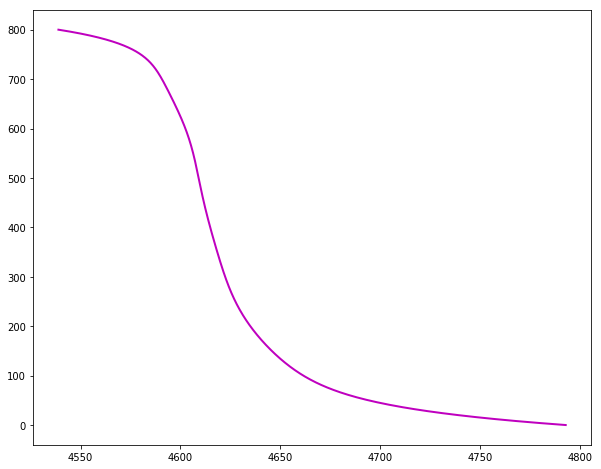

In [52]:
#define fiducial cut from MDC3 WS:

polyParams = [6.92312336e+02, -2.43739552e+02,  2.84329329e+03, -2.09128802e+04, 9.67156033e+04, \
            -2.84628041e+05,  5.31021633e+05, -6.06995609e+05, 3.87230616e+05, -1.05486503e+05]

def Fiducial(r, dt_us):
    if abs(dt_us) > 79 and abs(dt_us) < 789:
        r_max = 0
        for i in range(len(polyParams)):
            r_max += polyParams[i]*pow(dt_us/1000., i)
        if r < r_max/10.:
            return True
        else:
            return False
    else:
        return False
    
print(Fiducial(68,500))
    
    
def drawFiducialBoundary():
    drift = np.linspace(0., 800., 800)
    x,y = [], []
    for i in range(len(drift)):
        y.append( drift[i] )
        thisX = 0.
        for n in range(len(polyParams)):
            thisX += polyParams[n]*pow(drift[i]/1000., n)/10.
        x.append( thisX*thisX )
    plt.plot( x, y, 'm', lw=2, ms=0)

drawFiducialBoundary()
plt.show()


1331 Single Scatters Seen! 2.433 % of events!


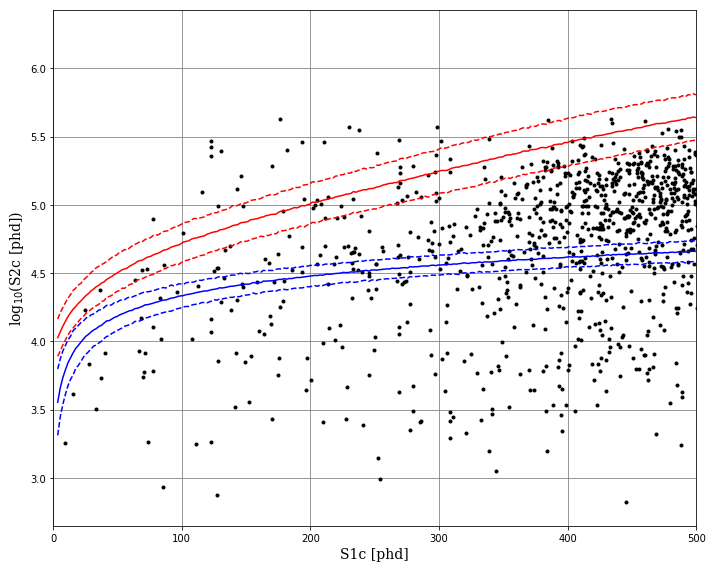

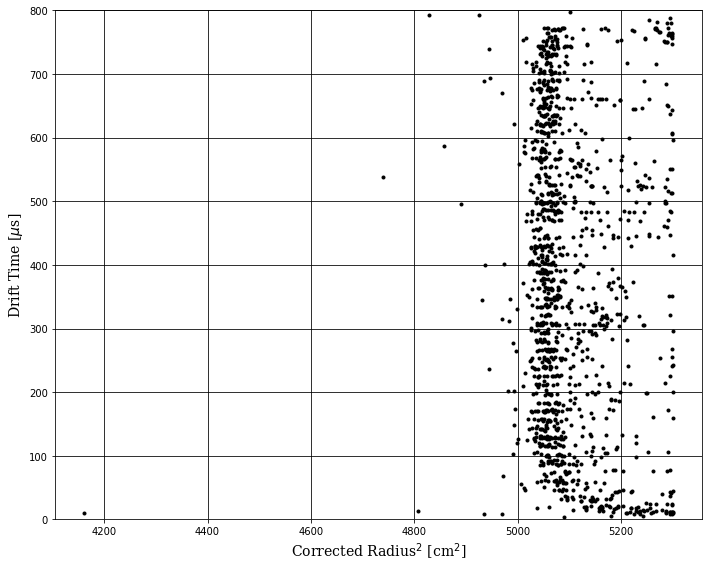

<function matplotlib.pyplot.show(*args, **kw)>

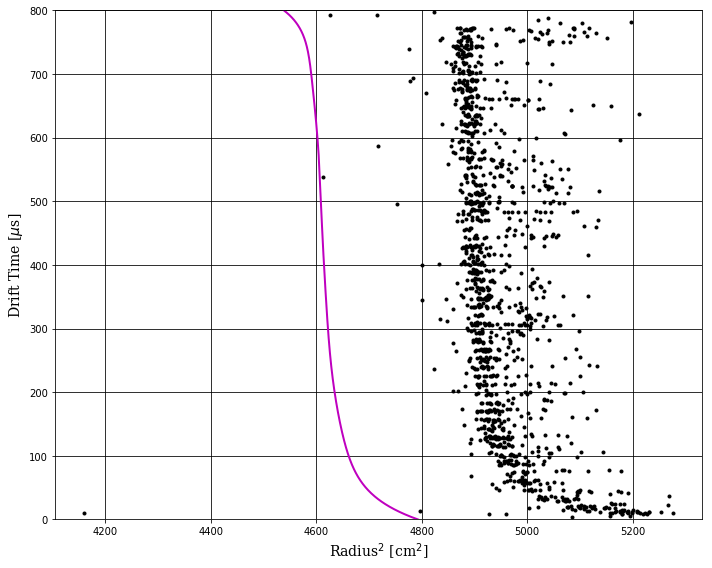

In [53]:
# Look at events that are tagged as single scatters:

S1c, logS2c = [], []
r2, drift = [], []
rc2, drift = [], []
nSS_observed = 0
for n in range(numEvents):
    GetEntry(n)
    if nSS == 1:
        r = (np.sqrt( x_ss*x_ss + y_ss*y_ss ) )
        dt = ( driftTime/1000. )
        #if Fiducial(r,dt ):
        S1c.append(correctedS1)
        logS2c.append(np.log10(correctedS2))
        r2.append(( x_ss*x_ss + y_ss*y_ss ) )
        rc2.append(( xc_ss*xc_ss + yc_ss*yc_ss ) )
        drift.append( driftTime/1000. )
        nSS_observed += 1
print( "%i Single Scatters Seen! %.3f %% of events!" % (nSS_observed, nSS_observed*100./numEvents))

plt.plot( S1c, logS2c, 'k o', ms = 3)
plt.xlabel('S1c [phd]', fontname='serif', fontsize = 14)
plt.ylabel(r'log$_{10}$(S2c [phd])', fontname='serif', fontsize = 14)
plt.grid(True, axis='both', which='both', color='grey')
plotER(False)
plotNR(False)
plt.xlim(0, 500)
plt.tight_layout()
plt.savefig("gammaBackground_singleScatters_s1_logs2.png")
plt.show()    


plt.plot(rc2, drift, 'k o', ms = 3)
#plt.plot([4000, 5300], [789, 789], 'm', lw = 2)
#plt.plot([4000, 5300], [79, 79], 'm', lw = 2)
plt.xlabel(r'Corrected Radius${}^2$ [cm${}^2$]', fontname='serif', fontsize = 14)
plt.ylabel(r'Drift Time [$\mu$s]', fontname='serif', fontsize = 14)
plt.grid(True, color = 'k')
#drawFiducialBoundary()
plt.ylim(0,800)
plt.tight_layout()
plt.savefig("gammaBackground_singleScatters_corPositions.png")
plt.show()

#plt.hist2d(r2, drift , bins = 40 , norm=LogNorm())
plt.plot(r2, drift, 'k o', ms = 3)
#plt.plot([4000, 5300], [789, 789], 'm', lw = 2)
#plt.plot([4000, 5300], [79, 79], 'm', lw = 2)
plt.xlabel(r'Radius${}^2$ [cm${}^2$]', fontname='serif', fontsize = 14)
plt.ylabel(r'Drift Time [$\mu$s]', fontname='serif', fontsize = 14)
plt.grid(True, color = 'k')
drawFiducialBoundary()
plt.ylim(0,800)
plt.tight_layout()
plt.savefig("gammaBackground_singleScatters_positions.png")
plt.show

    


MSSI: 351.128 4.54583 [727.91385862004893, 726.58613891911136] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 355.816 4.84891 [727.77517737867402, 725.88058569975124] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 370.284 4.79343 [727.73083552427624, 725.53339328718641] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 394.93 4.33724 [727.70723671448093, 727.02170626733403] 0 ["b'gamma+e-'", "b'e-+gamma'"]
MSSI: 696.47 3.84111 [727.86932890015612, 727.96787206892259] 0 ["b'e-+gamma'", "b'gamma+e-'"]
MSSI: 394.289 4.85938 [727.96077674737978, 727.38416340011042] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 304.822 3.6371 [727.99787959229366, 727.99421370731159] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 488.957 3.6277 [727.94122826847274, 727.2034309946971] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 537.782 4.55713 [727.77838244248903, 725.93664065930557] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 628.061 3.71115 [727.76935832921993, 727.73604348984031] 0 ["b'gamma+e-'", "b'gamma+e-'"]
MSSI: 445.791 4.59309 [727.74587603105078, 72

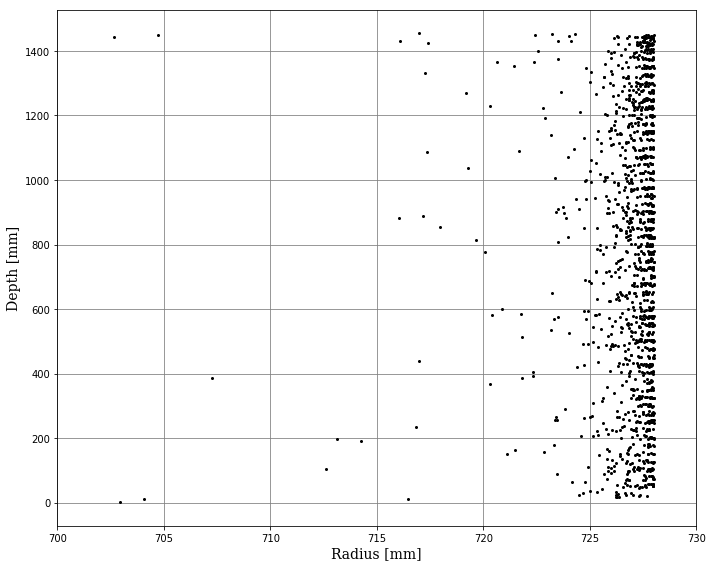

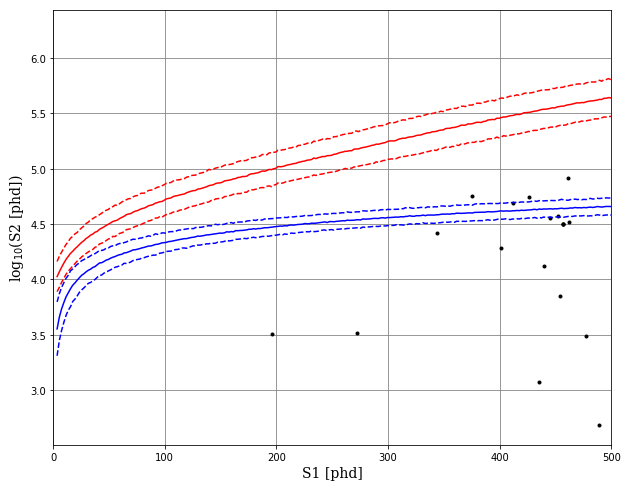

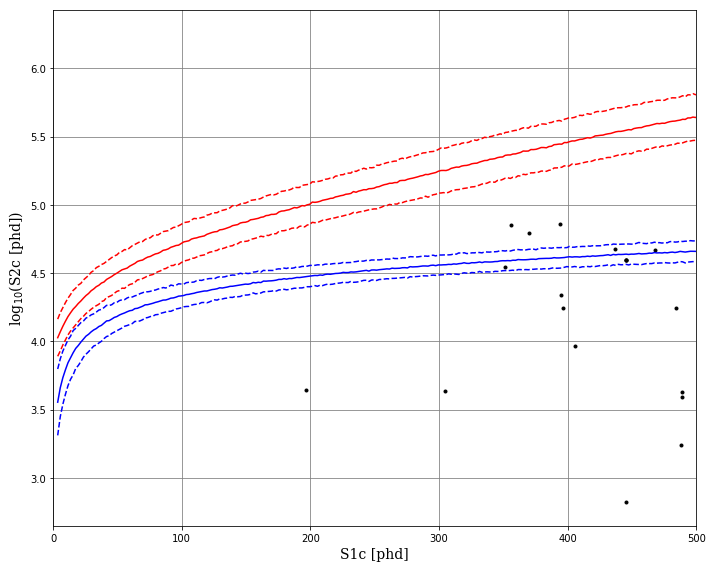

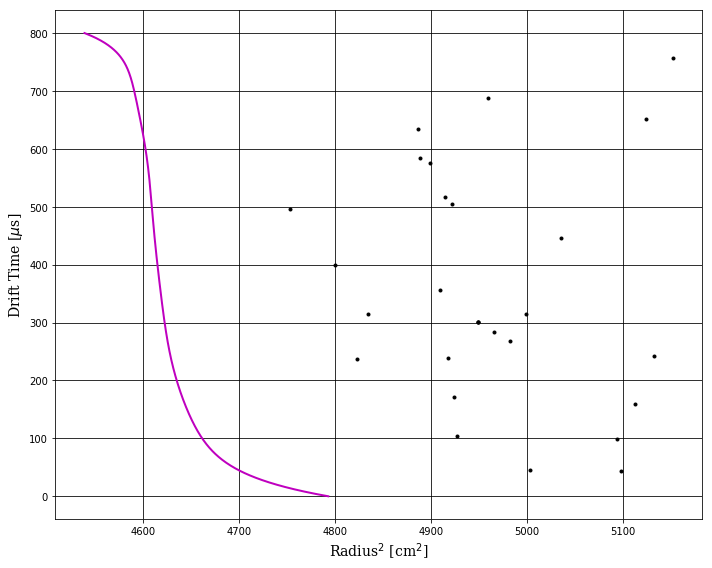

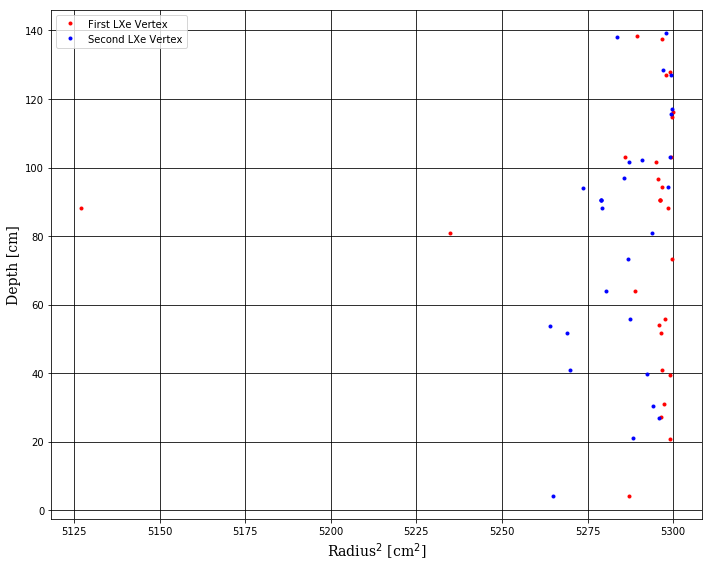

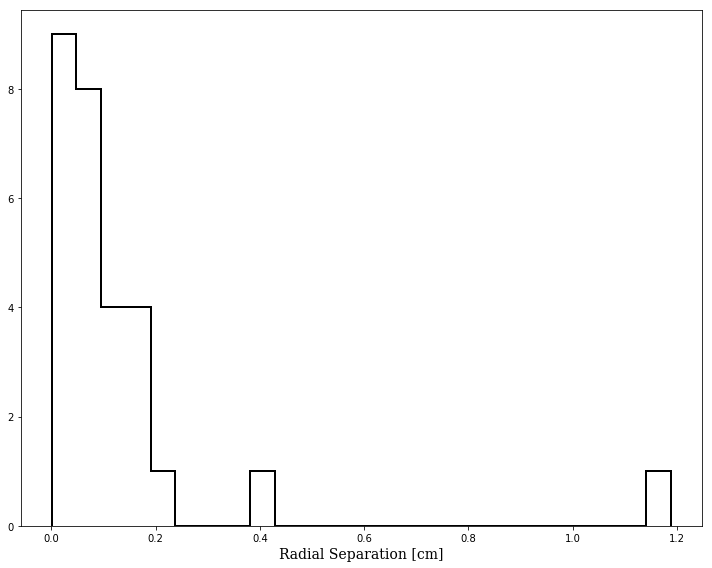

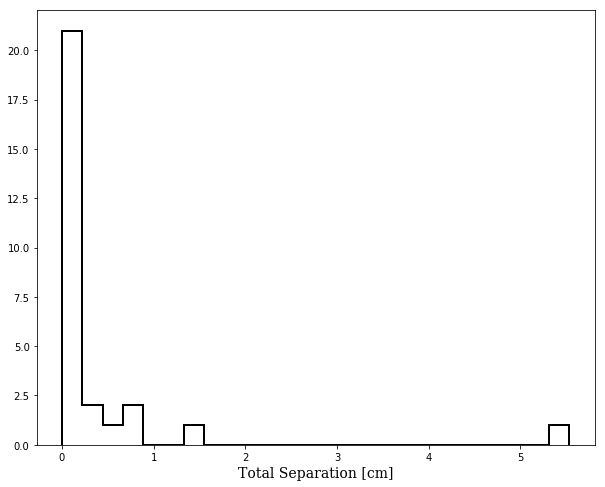

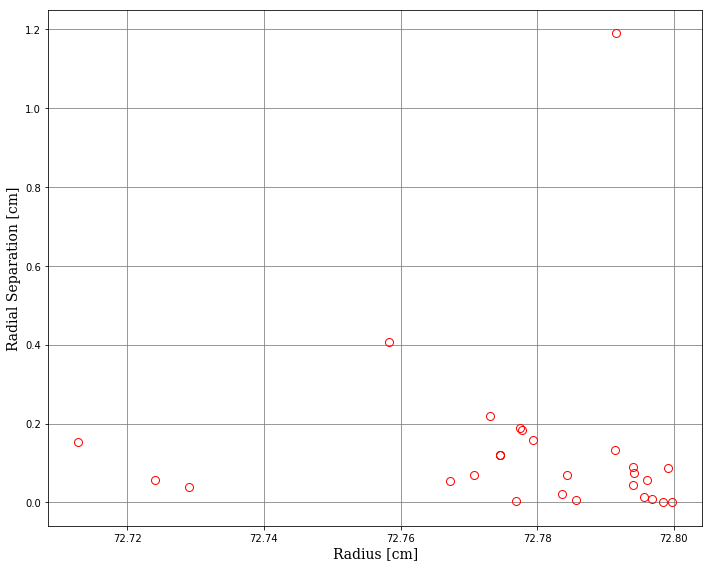

In [57]:
#Go through the single scatters, and see if any of them are secret MSSI events... spooky!!

vert_S1_sum, vert_logS2_sum = [], []
r2_true, z_true, r2_trueA, z_trueA, r2_trueB, z_trueB = [], [], [], [], [], []
r_true = []
mssi_S1c, mssi_logS2c = [], []
mssi_r2, mssi_drift = [], []
allr, allz = [], []
nMSSI = 0

deltaR = []
deltaD = []

for n in range(numEvents):
    GetEntry(n)
    if nVertices > 0 and nSS == 1:
        vetoScint = 0
        thisS1, thisS2 = 0, 0
        nS1s, nS2s = 0, 0
        particles = []
        theseRadii, theseZ = [], []
        for i in range(nVertices):
            if any([scint > 0 for scint in scintPhotons]):
                vetoScint += scintPhotons[i]
            if s1[i] > 0 and 'LiquidXenonTarget' in str(volumeName[i]):
                thisS1 += s1[i]  #adding up each s1 producing vertex
                nS1s += 1
                theseRadii.append( np.sqrt(x[i]*x[i] + y[i]*y[i]) )
                theseZ.append( z[i] )
                particles.append( str(particleName[i]))
            if s2[i] > 0 and 'LiquidXenonTarget' in str(volumeName[i]):
                thisS2 += s2[i]  #add up all of tje individual  S2 producing vertices
                nS2s += 1   #count the S2 producing vertices
                allr.append(np.sqrt(x[i]*x[i] + y[i]*y[i]))
                allz.append( z[i] )
            if ( nS1s > 1 and nS2s == 1 ): #and correctedS1 < 500.):
                nMSSI += 1
                print("MSSI:", correctedS1, np.log10(correctedS2), theseRadii, vetoScint, particles )
                vert_S1_sum.append( thisS1 )
                vert_logS2_sum.append( np.log10( thisS2 ) )
                r2_trueA.append( (theseRadii[0]/10.)**2 )
                r2_trueB.append( (theseRadii[1]/10.)**2 )
                r2_true.append( (theseRadii[0]/10.)**2 )
                r2_true.append( (theseRadii[1]/10.)**2 )
                r_true.append( max(theseRadii)/10. )
                z_trueA.append( theseZ[0]/10. )
                z_trueB.append( theseZ[1]/10. )
                z_true.append( theseZ[0]/10. )
                z_true.append( theseZ[1]/10. )
                deltaR.append( abs( theseRadii[1]/10. - theseRadii[0]/10.) )
                pos0 = np.sqrt( (theseRadii[0]/10) ** 2. + (theseZ[0]/10.) ** 2. )
                pos1 = np.sqrt( (theseRadii[1]/10) ** 2. + (theseZ[1]/10.) ** 2. )
                deltaD.append( abs(pos1-pos0) )
                mssi_S1c.append( correctedS1 )
                mssi_logS2c.append( np.log10(correctedS2) )
                mssi_r2.append( x_ss*x_ss + y_ss*y_ss )
                mssi_drift.append( driftTime/1000. )
                if ( abs( theseRadii[1]/10. - theseRadii[0]/10.) ) > 1.:
                    print( "SEPARATED: ", correctedS1, np.log10(correctedS2) )
print(nMSSI)
print( "%i MSSI Events Seen! %.3f %% of SingleScatters, %.3f %% of events!" % (nMSSI, nMSSI*100./nSS_observed, nMSSI*100./numEvents))

plt.plot(allr, allz, 'k o', ms = 2 )
plt.xlabel(r'Radius [mm]', fontname='serif', fontsize = 14)
plt.ylabel(r'Depth [mm]', fontname='serif', fontsize = 14)
plt.xlim(700, 730)
plt.grid(True, color = 'grey')
plt.tight_layout()
plt.savefig("allSingleScatter_positions.png")
plt.show()
            
plt.plot( vert_S1_sum, vert_logS2_sum, 'k o', ms = 3)            
plt.xlabel('S1 [phd]', fontname='serif', fontsize = 14)
plt.ylabel(r'log$_{10}$(S2 [phd])', fontname='serif', fontsize = 14)
plt.grid(True, axis='both', which='both', color='grey')
plotER(False)
plotNR(False)
plt.xlim(0, 500)
plt.show()    



plt.plot( mssi_S1c, mssi_logS2c, 'k o', ms = 3)            
plt.xlabel('S1c [phd]', fontname='serif', fontsize = 14)
plt.ylabel(r'log$_{10}$(S2c [phd])', fontname='serif', fontsize = 14)
plt.grid(True, axis='both', which='both', color='grey')
plotER(False)
plotNR(False)
plt.xlim(0, 500)
plt.tight_layout()
plt.savefig("mssi_s1_logS2.png")
plt.show()    
   
#plt.hist2d(r2, drift , bins = 40 , norm=LogNorm())
plt.plot(mssi_r2, mssi_drift, 'k o', ms = 3)
plt.xlabel(r'Radius${}^2$ [cm${}^2$]', fontname='serif', fontsize = 14)
plt.ylabel(r'Drift Time [$\mu$s]', fontname='serif', fontsize = 14)
plt.grid(True, color = 'k')
drawFiducialBoundary()
plt.tight_layout()
plt.savefig("mssi_positions.png")
plt.show()

plt.plot(r2_trueA, z_trueA, 'r o', ms = 3, label = 'First LXe Vertex')
plt.plot(r2_trueB, z_trueB, 'b o', ms = 3, label = 'Second LXe Vertex')
plt.xlabel(r'Radius${}^2$ [cm${}^2$]', fontname='serif', fontsize = 14)
plt.ylabel(r'Depth [cm]', fontname='serif', fontsize = 14)
plt.grid(True, color = 'k')
plt.legend(loc = 'best')
plt.tight_layout()
plt.savefig("mssi_true_positions_eachScatter.png")
plt.show()
 
    
plt.hist(deltaR, bins = 25, histtype='step', color = 'k', lw = 2)
plt.xlabel(r'Radial Separation [cm]', fontname='serif', fontsize = 14)
plt.tight_layout()
plt.savefig("radialSeparationHist.png")
plt.show()

plt.hist(deltaD, bins = 25, histtype='step', color = 'k', lw = 2)
plt.xlabel(r'Total Separation [cm]', fontname='serif', fontsize = 14)
plt.show()

plt.plot(r_true, deltaR, 'r o', ms = 8., mfc = 'none')
plt.xlabel(r'Radius [cm]', fontname='serif', fontsize = 14)
plt.ylabel(r'Radial Separation [cm]', fontname='serif', fontsize = 14)
plt.grid(True, color = "grey")
plt.tight_layout()
plt.savefig("radialSeparation_vs_rPos.png")
plt.show()

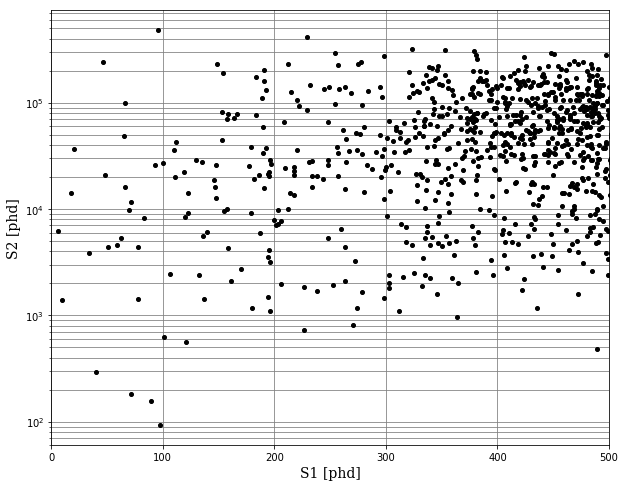

In [58]:
s1Arr = np.asarray(detectedS1Photons_list)
s2Arr = np.asarray(detectedS2Photons_list)
s1s =  s1Arr[s1AboveZero & s2AboveZero & inTPC & hasGamma]
s2s =  s2Arr[s1AboveZero & s2AboveZero & inTPC & hasGamma]

summedS1s, summedS2s = [], []
for i in range(len(s1s)):
    summedS1s.append(sum(s1s[i]))
for i in range(len(s2s)):
    summedS2s.append(sum(s2s[i]))

plt.plot(summedS1s, summedS2s, 'k o', markersize = 4)
plt.yscale('log')
plt.xlabel('S1 [phd]', fontname='serif', fontsize = 14)
plt.ylabel('S2 [phd]', fontname='serif', fontsize = 14)
plt.grid(True, axis='both', which='both', color='grey')
plt.xlim(0, 500)
plt.show()
plt.show()